In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

# New Section

In [ ]:
dataset = pd.read_csv('nikhil.csv')

In [ ]:
dataset

,a,Confirmed,No_HH,Code,Active,Recovered,Deceased,TOT_P,P_LIT,TOT_WORK_P,Total_number_of_households_1,Total_number_of_households_2,Total_number_of_households_3,Total_number_of_households_4,Total_number_of_households_5,Total_number_of_households_6-8,Total_number_of_households_9+,percentage_within_premises,percentage_alternative_public,percentage_alternative_open,Total_households,pop_above60,Total_Households_with_None_Workers,Total_workers_in_households_with_one_workers
0,0,5631,113929,1,58,5479,94,870354,439654,229064,911,4036,6396,10700,14886,42727,27121,0.508864,0.077910,0.413226,112761,49047,9307,58374
1,1,7565,21909,3,73,7408,84,133487,93770,75079,1630,1483,2302,4422,3804,5378,1758,0.903884,0.010396,0.085720,21435,11489,1697,6085
2,2,2103,18338,4,4,2055,44,140802,86236,51873,689,834,983,1652,2356,6832,4866,0.969086,0.004448,0.026466,18017,9343,1255,6370
3,3,2485,90261,5,30,2431,24,476835,261724,161393,1531,7435,10664,15825,18028,31443,3952,0.186615,0.020500,0.792885,89907,33381,7661,43710
4,4,3864,130401,6,7,3802,55,642415,364109,290912,2107,12777,18069,25803,26161,35702,3381,0.143371,0.013839,0.842790,129528,45048,9142,39185
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
597,597,1942,7420,636,71,1862,9,41816,36470,11802,185,402,821,1655,1083,1709,1342,0.978324,0.015284,0.006392,7403,5015,1239,2891
598,598,3849,49705,637,24,3761,64,200222,154916,68301,2894,5828,9084,15087,9435,6876,864,0.605696,0.032656,0.361648,49642,19327,5141,27633
599,599,0,9288,638,0,0,0,36842,25332,17125,960,1442,1954,2326,1499,1443,335,0.808816,0.008133,0.183051,9214,2648,951,4245
600,600,1,26199,639,0,1,0,105597,78683,38579,2124,2847,4593,7087,4587,4324,765,0.482546,0.009420,0.508034,26141,8998,1610,14891


In [ ]:
dataset.columns

Index(['a', 'Confirmed', 'No_HH', 'Code', 'Active', 'Recovered', 'Deceased',
       'TOT_P', 'P_LIT', 'TOT_WORK_P', 'Total_number_of_households_1',
       'Total_number_of_households_2', 'Total_number_of_households_3',
       'Total_number_of_households_4', 'Total_number_of_households_5',
       'Total_number_of_households_6-8', 'Total_number_of_households_9+',
       'percentage_within_premises', 'percentage_alternative_public',
       'percentage_alternative_open', 'Total_households', 'pop_above60',
       'Total_Households_with_None_Workers',
       'Total_workers_in_households_with_one_workers'],
      dtype='object')

In [ ]:
dataset = dataset.drop(['a', 'No_HH',   'Code',           'Active',
              'Recovered',
              'Total_number_of_households_1',
              'Total_number_of_households_2',
              'Total_number_of_households_3',
              'Total_number_of_households_4',
              'Total_number_of_households_5',
              'Total_number_of_households_6-8',
              'Total_number_of_households_9+',
              'percentage_within_premises',
              'percentage_alternative_public',
              'percentage_alternative_open',
              'Total_households',
              'pop_above60',
              'Total_Households_with_None_Workers',
              'Total_workers_in_households_with_one_workers',], axis = 1)

In [ ]:
dataset

,Confirmed,Deceased,TOT_P,P_LIT,TOT_WORK_P
0,5631,94,870354,439654,229064
1,7565,84,133487,93770,75079
2,2103,44,140802,86236,51873
3,2485,24,476835,261724,161393
4,3864,55,642415,364109,290912
...,...,...,...,...,...
597,1942,9,41816,36470,11802
598,3849,64,200222,154916,68301
599,0,0,36842,25332,17125
600,1,0,105597,78683,38579


KMeans Clustering Elbow Method Graph

In [ ]:
from sklearn.cluster import KMeans


kmeans = KMeans(n_clusters = 50, init="k-means++", random_state = 42)
kmeans.fit(dataset)
  #wcss.append(kmeans.inertia_)



KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=50, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [ ]:
from numpy import asarray
y_p = kmeans.predict(dataset)
y_p = asarray(y_p)

In [ ]:
from numpy import savetxt
savetxt('output1.csv', y_p, delimiter=',')

In [ ]:
y_p

array([24, 30, 30, 37, 13, 13, 37, 35,  3, 37,  3,  6, 37, 37,  3,  3, 13,
        3,  0,  3, 13, 32, 30, 37,  6, 13, 13, 13, 43, 30, 26, 43, 26,  0,
       13, 13, 12, 43, 27, 13, 15, 24, 36, 39,  6, 13, 32, 13,  6,  3, 37,
        3, 13, 36, 37,  3, 13,  3, 43, 32, 36, 13, 35, 35, 43,  6,  0, 35,
        0, 35, 43, 35, 32, 32,  6, 43, 43, 43,  0, 36, 43, 12, 43, 26, 36,
       30, 13,  4, 26,  4, 27, 14, 28, 27,  7, 25, 39, 15, 15, 32, 16, 39,
       20, 25, 13, 28, 14, 43, 27, 39, 15,  6, 28,  6, 15, 15, 36, 35, 15,
       31, 22, 29, 22, 23, 23, 22, 35, 22, 32, 22, 22, 23,  1, 23, 36, 20,
       19, 27, 10, 19, 29, 10,  1, 22, 14, 32,  0,  0, 36, 49, 32,  7,  6,
        6, 37, 24, 14, 43, 39, 24, 22, 15,  5, 20, 23, 29, 20,  6, 27, 20,
       23, 23, 14, 39,  1, 22, 10,  1,  7, 22,  1, 22, 27, 12, 23, 14, 14,
       29, 42, 13, 20, 19,  7, 28, 15, 20, 10, 14, 14, 29,  1, 23, 22, 29,
       22, 19, 10, 15, 10, 27, 35, 43, 13, 10,  5, 39, 14,  0, 10, 19,  7,
       14,  6, 13, 30, 30

In [ ]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 602):
  kmeans = KMeans(n_clusters = i, init="k-means++", random_state = 42)
  kmeans.fit(dataset)
  wcss.append(kmeans.inertia_)

plt.title("Number of clusters vs WCSS")
plt.plot(range(1, 602), wcss)
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

In [ ]:
plt.title("Number of clusters vs WCSS")
plt.plot(range(1,  10), wcss[1:10])
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()
plt.savefig('done.png')

Hierarchical Clustering Dendogram

In [ ]:
import scipy.cluster.hierarchy as sch
dendogram = sch.dendrogram(sch.linkage(dataset, method="ward"))
plt.title("Dendrogram")
plt.xlabel("Customers")
plt.ylabel("Euclidean Distance")
plt.show()

Correlations


In [ ]:
corr_matrix = dataset.corr()

In [ ]:
print(type(corr_matrix['Confirmed'].sort_values(ascending = False)))

<class 'pandas.core.series.Series'>


In [ ]:
corr_matrix['Confirmed']

Code                                                                         0.266302
Confirmed                                                                    1.000000
Active                                                                       0.273176
Recovered                                                                    0.993227
Deceased                                                                     0.869616
                                                                               ...   
Total households with Four plus Workers                                      0.453777
Total workers in households with Four Plus Workers                           0.431841
Main workers in households with Four Plus Workers                            0.522122
Marginal workers(3-6 months) in households with Four Plus Workers            0.105167
Marginal workers(less than 3 months) in households with Four Plus Workers   -0.009887
Name: Confirmed, Length: 184, dtype: float64

In [ ]:
corr_matrix['Confirmed']
row = corr_matrix['Confirmed'].index
row = list(row)
print(row)

['Code', 'Confirmed', 'Active', 'Recovered', 'Deceased', 'State', 'No_HH', 'TOT_P', 'TOT_M', 'TOT_F', 'P_06', 'M_06', 'F_06', 'P_SC', 'M_SC', 'F_SC', 'P_ST', 'M_ST', 'F_ST', 'P_LIT', 'M_LIT', 'F_LIT', 'P_ILL', 'M_ILL', 'F_ILL', 'TOT_WORK_P', 'TOT_WORK_M', 'TOT_WORK_F', 'MAINWORK_P', 'MAINWORK_M', 'MAINWORK_F', 'MAIN_CL_P', 'MAIN_CL_M', 'MAIN_CL_F', 'MAIN_AL_P', 'MAIN_AL_M', 'MAIN_AL_F', 'MAIN_HH_P', 'MAIN_HH_M', 'MAIN_HH_F', 'MAIN_OT_P', 'MAIN_OT_M', 'MAIN_OT_F', 'MARGWORK_P', 'MARGWORK_M', 'MARGWORK_F', 'MARG_CL_P', 'MARG_CL_M', 'MARG_CL_F', 'MARG_AL_P', 'MARG_AL_M', 'MARG_AL_F', 'MARG_HH_P', 'MARG_HH_M', 'MARG_HH_F', 'MARG_OT_P', 'MARG_OT_M', 'MARG_OT_F', 'MARGWORK_3_6_P', 'MARGWORK_3_6_M', 'MARGWORK_3_6_F', 'MARG_CL_3_6_P', 'MARG_CL_3_6_M', 'MARG_CL_3_6_F', 'MARG_AL_3_6_P', 'MARG_AL_3_6_M', 'MARG_AL_3_6_F', 'MARG_HH_3_6_P', 'MARG_HH_3_6_M', 'MARG_HH_3_6_F', 'MARG_OT_3_6_P', 'MARG_OT_3_6_M', 'MARG_OT_3_6_F', 'MARGWORK_0_3_P', 'MARGWORK_0_3_M', 'MARGWORK_0_3_F', 'MARG_CL_0_3_P', 'MARG

In [ ]:
value = list(corr_matrix['Confirmed'])
value

[0.2663024327894583,
 1.0,
 0.27317588979943636,
 0.9932266484302622,
 0.8696161595164935,
 0.2750486947079912,
 0.6425540575344082,
 0.5771837072852741,
 0.5731861647478901,
 0.5803675388036019,
 0.4278983856430986,
 0.4271265761972616,
 0.4283095944809665,
 0.34453445084996887,
 0.33607768205484223,
 0.3530786771892114,
 0.11055414253453603,
 0.11222104036906597,
 0.10884806801761582,
 0.6598265485152253,
 0.6356365385932009,
 0.6839213783822677,
 0.326507092001414,
 0.3339804040062154,
 0.31887285930136133,
 0.6152656275808311,
 0.6186681383707823,
 0.5267450013572609,
 0.6689054683452259,
 0.6578800322205947,
 0.5979712441165986,
 0.2050877938280133,
 0.157273334749786,
 0.2505799171128984,
 0.25113986389528675,
 0.2196862878380335,
 0.2558293083325662,
 0.320221327011256,
 0.39608613444524676,
 0.18129864165436999,
 0.741341643396672,
 0.7240300285264005,
 0.7764595849689929,
 0.17704738291833802,
 0.17641265398078992,
 0.1592855766852379,
 -0.037881312998498215,
 -0.0399696828770

In [ ]:
for value in corr_matrix['Confirmed'].sort_values(ascending = False):
  print(value)

In [ ]:
len(row)

184

In [ ]:
type(value)
len(value)

184

In [ ]:
corr = list(zip(row, value))
print(corr)

[('Code', 0.2663024327894583), ('Confirmed', 1.0), ('Active', 0.27317588979943636), ('Recovered', 0.9932266484302622), ('Deceased', 0.8696161595164935), ('State', 0.2750486947079912), ('No_HH', 0.6425540575344082), ('TOT_P', 0.5771837072852741), ('TOT_M', 0.5731861647478901), ('TOT_F', 0.5803675388036019), ('P_06', 0.4278983856430986), ('M_06', 0.4271265761972616), ('F_06', 0.4283095944809665), ('P_SC', 0.34453445084996887), ('M_SC', 0.33607768205484223), ('F_SC', 0.3530786771892114), ('P_ST', 0.11055414253453603), ('M_ST', 0.11222104036906597), ('F_ST', 0.10884806801761582), ('P_LIT', 0.6598265485152253), ('M_LIT', 0.6356365385932009), ('F_LIT', 0.6839213783822677), ('P_ILL', 0.326507092001414), ('M_ILL', 0.3339804040062154), ('F_ILL', 0.31887285930136133), ('TOT_WORK_P', 0.6152656275808311), ('TOT_WORK_M', 0.6186681383707823), ('TOT_WORK_F', 0.5267450013572609), ('MAINWORK_P', 0.6689054683452259), ('MAINWORK_M', 0.6578800322205947), ('MAINWORK_F', 0.5979712441165986), ('MAIN_CL_P', 0

In [ ]:
for row, value in corr:
  print(f"{row}\t\t{value}")

Code		0.2663024327894583
Confirmed		1.0
Active		0.27317588979943636
Recovered		0.9932266484302622
Deceased		0.8696161595164935
State		0.2750486947079912
No_HH		0.6425540575344082
TOT_P		0.5771837072852741
TOT_M		0.5731861647478901
TOT_F		0.5803675388036019
P_06		0.4278983856430986
M_06		0.4271265761972616
F_06		0.4283095944809665
P_SC		0.34453445084996887
M_SC		0.33607768205484223
F_SC		0.3530786771892114
P_ST		0.11055414253453603
M_ST		0.11222104036906597
F_ST		0.10884806801761582
P_LIT		0.6598265485152253
M_LIT		0.6356365385932009
F_LIT		0.6839213783822677
P_ILL		0.326507092001414
M_ILL		0.3339804040062154
F_ILL		0.31887285930136133
TOT_WORK_P		0.6152656275808311
TOT_WORK_M		0.6186681383707823
TOT_WORK_F		0.5267450013572609
MAINWORK_P		0.6689054683452259
MAINWORK_M		0.6578800322205947
MAINWORK_F		0.5979712441165986
MAIN_CL_P		0.2050877938280133
MAIN_CL_M		0.157273334749786
MAIN_CL_F		0.2505799171128984
MAIN_AL_P		0.25113986389528675
MAIN_AL_M		0.2196862878380335
MAIN_AL_F		0.25582930

In [ ]:
list_of = []
for i in corr:
  if(i[1] >= 0.5):
    list_of.append(i[0])


for i in list_of:
  print(i)

Confirmed
Recovered
Deceased
No_HH
TOT_P
TOT_M
TOT_F
P_LIT
M_LIT
F_LIT
TOT_WORK_P
TOT_WORK_M
TOT_WORK_F
MAINWORK_P
MAINWORK_M
MAINWORK_F
MAIN_OT_P
MAIN_OT_M
MAIN_OT_F
MARG_OT_P
MARG_OT_M
MARG_OT_F
MARG_OT_3_6_P
MARG_OT_3_6_M
MARG_OT_3_6_F
NON_WORK_P
NON_WORK_M
NON_WORK_F
Total number of households_1
R_01
R_11
R_21
R_31
R_41
Total number of households_2
R_12
R_22
R_32
R_42
Total number of households_3
R_13
R_23
R_33
R_43
R_53
Total number of households_4
R_14
R_24
R_34
R_44
Total number of households_5
R_25
R_35
R_45
Total_households
T_1
T_2
T_3
T_4
T_5
pop_above60
Total Households with None Workers
Total households with One Workers
Total workers in households with one workers
Main workers in households with One Workers
Total households with Two Workers
Total workers in households with Two Workers
Main workers in households with Two Workers
Total households with Three Workers
Total workers in households with Three Workers
Main workers in households with Three Workers
Main workers in hou

Reducing Column

In [ ]:
for column in dataset.columns:
  print(column)

Code
Confirmed
Active
Recovered
Deceased
State
No_HH
TOT_P
TOT_M
TOT_F
P_06
M_06
F_06
P_SC
M_SC
F_SC
P_ST
M_ST
F_ST
P_LIT
M_LIT
F_LIT
P_ILL
M_ILL
F_ILL
TOT_WORK_P
TOT_WORK_M
TOT_WORK_F
MAINWORK_P
MAINWORK_M
MAINWORK_F
MAIN_CL_P
MAIN_CL_M
MAIN_CL_F
MAIN_AL_P
MAIN_AL_M
MAIN_AL_F
MAIN_HH_P
MAIN_HH_M
MAIN_HH_F
MAIN_OT_P
MAIN_OT_M
MAIN_OT_F
MARGWORK_P
MARGWORK_M
MARGWORK_F
MARG_CL_P
MARG_CL_M
MARG_CL_F
MARG_AL_P
MARG_AL_M
MARG_AL_F
MARG_HH_P
MARG_HH_M
MARG_HH_F
MARG_OT_P
MARG_OT_M
MARG_OT_F
MARGWORK_3_6_P
MARGWORK_3_6_M
MARGWORK_3_6_F
MARG_CL_3_6_P
MARG_CL_3_6_M
MARG_CL_3_6_F
MARG_AL_3_6_P
MARG_AL_3_6_M
MARG_AL_3_6_F
MARG_HH_3_6_P
MARG_HH_3_6_M
MARG_HH_3_6_F
MARG_OT_3_6_P
MARG_OT_3_6_M
MARG_OT_3_6_F
MARGWORK_0_3_P
MARGWORK_0_3_M
MARGWORK_0_3_F
MARG_CL_0_3_P
MARG_CL_0_3_M
MARG_CL_0_3_F
MARG_AL_0_3_P
MARG_AL_0_3_M
MARG_AL_0_3_F
MARG_HH_0_3_P
MARG_HH_0_3_M
MARG_HH_0_3_F
MARG_OT_0_3_P
MARG_OT_0_3_M
MARG_OT_0_3_F
NON_WORK_P
NON_WORK_M
NON_WORK_F
Total number of households_1
R_01
R_11
R_21
R_31
R

In [ ]:
copy = dataset.copy()

In [ ]:
copy.columns

Index(['Code', 'Confirmed', 'Active', 'Recovered', 'Deceased', 'State',
       'No_HH', 'TOT_P', 'TOT_M', 'TOT_F',
       ...
       'Total households with Three Workers',
       'Total workers in households with Three Workers',
       'Main workers in households with Three Workers',
       'Marginal workers(3-6 months) in households with Three Workers',
       'Marginal workers(less than 3 months) in households with Three Workers',
       'Total households with Four plus Workers',
       'Total workers in households with Four Plus Workers',
       'Main workers in households with Four Plus Workers',
       'Marginal workers(3-6 months) in households with Four Plus Workers',
       'Marginal workers(less than 3 months) in households with Four Plus Workers'],
      dtype='object', length=184)

In [ ]:
copy = copy.drop([''], axis = 1)


Code,District_x,Confirmed,Active,Recovered,Deceased,No_HH,TOT_P,TOT_M,
P_LIT,TOT_WORK_P,Total number of households_1,Total number of households_2,Total number of households_3,Total number of households_4,Total number of households_5,Total number of households_6-8,Total number of households_9+,percentage_within_premises,percentage_alternative_public,percentage_alternative_open,Total_households,pop_above60,Total Households with None Workers,Total workers in households with one workers

In [ ]:
req = ['Code','District_x','Confirmed','Active','Recovered','Deceased','No_HH','TOT_P', 'P_LIT','TOT_WORK_P','Total number of households_1','Total number of households_2','Total number of households_3','Total number of households_4','Total number of households_5','Total number of households_6-8','Total number of households_9+','percentage_within_premises','percentage_alternative_public','percentage_alternative_open','Total_households','pop_above60','Total Households with None Workers','Total workers in households with one workers']

In [ ]:
not_req = [x for x in dataset.columns if x not in req]

In [ ]:
copy_dataset = dataset.copy()
copy_dataset = copy_dataset.drop(not_req, axis = 1)

In [ ]:
copy_dataset.shape

(602, 23)

In [ ]:
corr = copy_dataset.corr()
corr['Confirmed']

Code                                            0.266302
Confirmed                                       1.000000
Active                                          0.273176
Recovered                                       0.993227
Deceased                                        0.869616
No_HH                                           0.642554
TOT_P                                           0.577184
P_LIT                                           0.659827
TOT_WORK_P                                      0.615266
Total number of households_1                    0.641342
Total number of households_2                    0.646103
Total number of households_3                    0.675128
Total number of households_4                    0.681563
Total number of households_5                    0.604901
Total number of households_6-8                  0.381416
Total number of households_9+                   0.183698
percentage_within_premises                      0.244329
percentage_alternative_public  

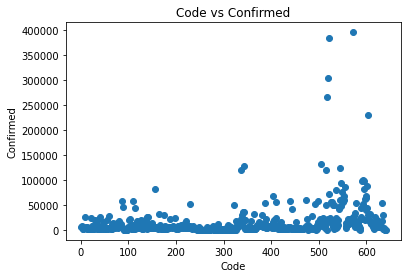

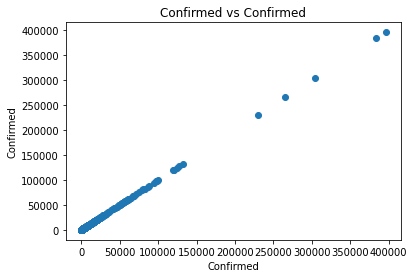

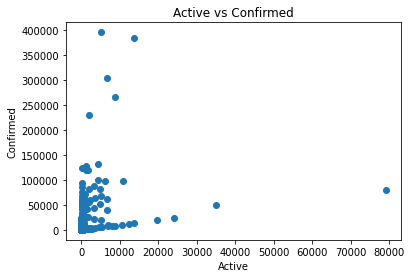

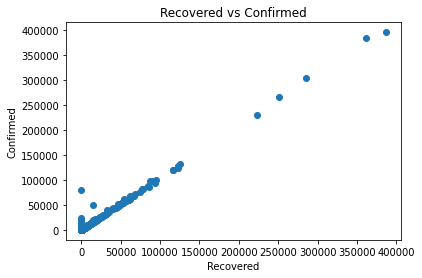

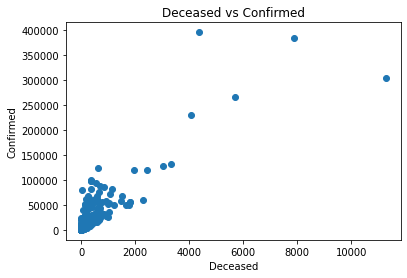

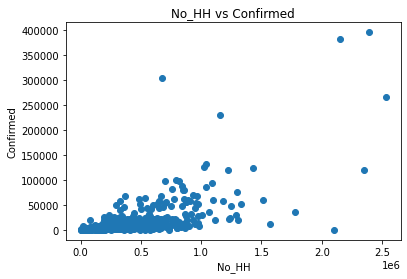

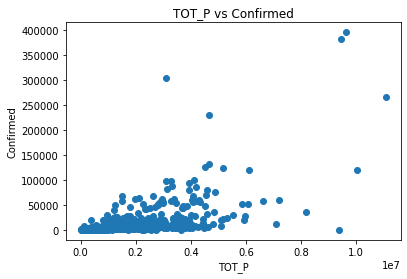

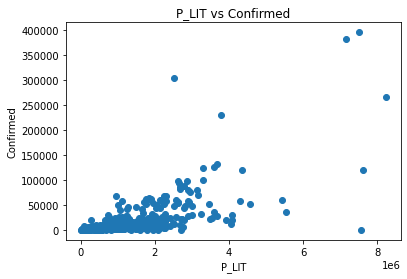

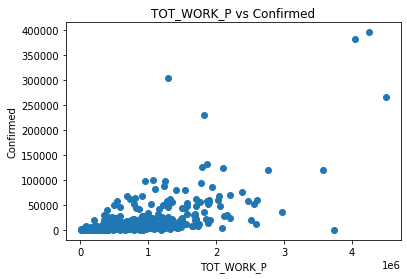

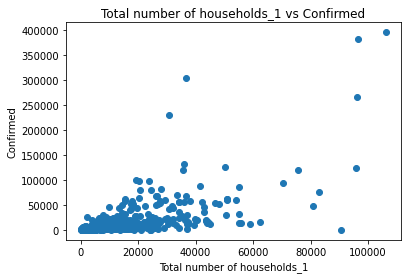

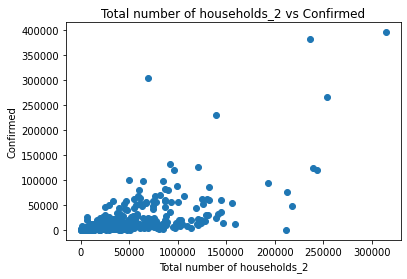

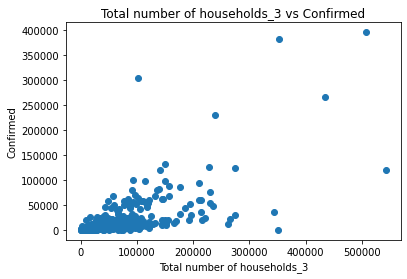

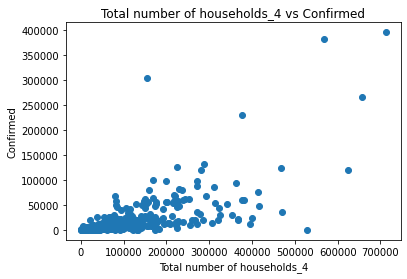

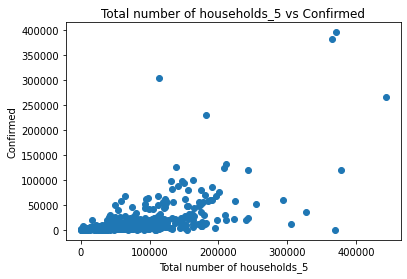

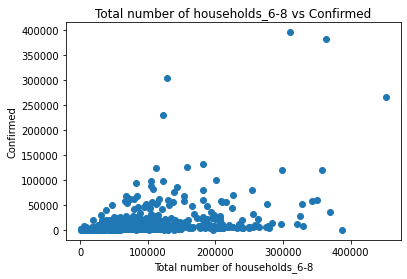

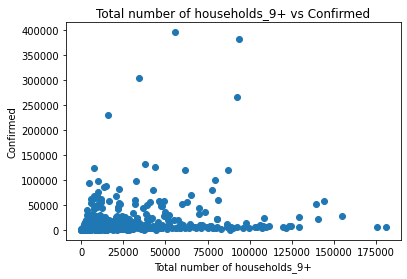

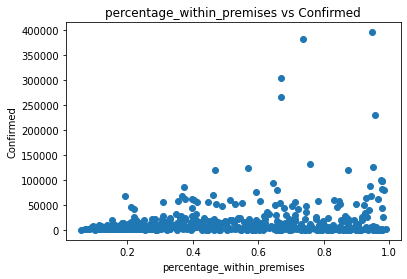

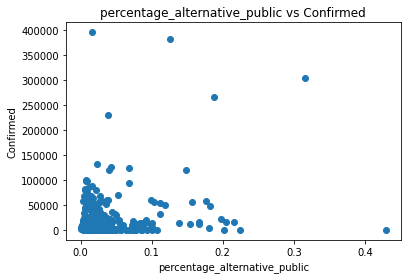

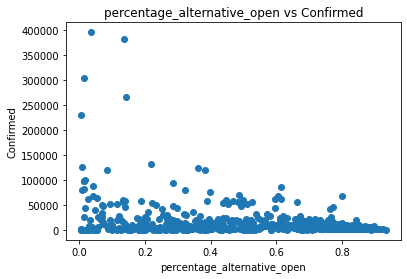

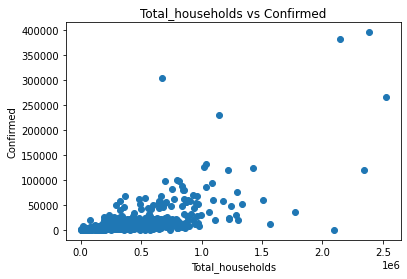

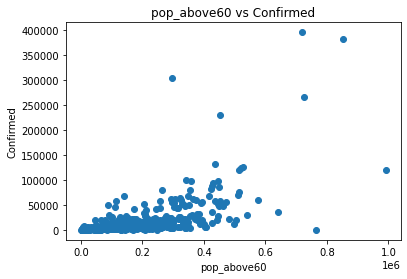

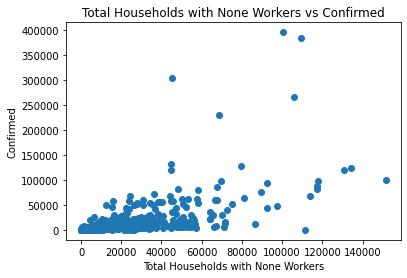

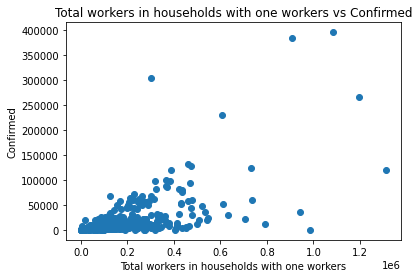

In [ ]:
from pandas.plotting import scatter_matrix
for i in copy_dataset.columns:
  plt.scatter(dataset[i], dataset['Confirmed'])
  plt.xlabel(i)
  plt.ylabel('Confirmed')
  plt.title(f'{i} vs Confirmed')
  plt.show()

KMeans Clustering

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


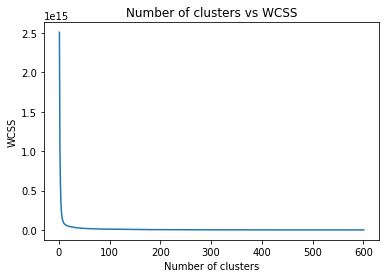

In [ ]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 602):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
  kmeans.fit(copy_dataset)
  wcss.append(kmeans.inertia_)
  print(len(wcss))
plt.plot(range(1, 602), wcss)
plt.title("Number of clusters vs WCSS")
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
copy_dataset.to_csv('donefinal.csv')